In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing

/Users/thomasdixon/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/thomasdixon/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/thomasdixon/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/thomasdixon/anaconda3/lib/python3.7/site-packages/tensorf

In [2]:
num_data_points = 500

def create_data(num_data_points):
    training_data_X = np.random.randint(0, 256, size=(num_data_points, 2))
    
    y = []
    for index in range(num_data_points):
        if training_data_X[index][1] > 0.005*(training_data_X[index][0]-0.5)**2 + 50 and training_data_X[index][1] < 0.005*(training_data_X[index][0]-0.5)**2 + 150:
            y.append([1])
        else:
            y.append([0])

    y = np.array(y)
    
    Z = np.concatenate((training_data_X,y),1)
    return Z

In [3]:
Z = create_data(num_data_points)

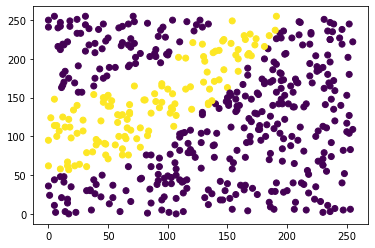

In [4]:
X = Z[:,:-1]
y = Z[:,-1]
y = y.reshape(-1,1)

c = y.T[0]
#c = np.where(c==0, 'red', c)
#c = np.where(c=='1', 'blue', c)
plt.scatter(*zip(*X), c=c)
plt.show()

In [5]:
print("Before var: %.4f" % np.var(X))
print("Before mean: %.4f" % np.mean(X))

normalized_data = preprocessing.normalize(X)
print("Normalized var: %.4f" % np.var(normalized_data))
print("Normalized mean: %.4f" % np.mean(normalized_data))

Before var: 5448.3974
Before mean: 127.9130
Normalized var: 0.0788
Normalized mean: 0.6490


In [6]:
inputs = keras.Input(shape=(2))
x = keras.layers.Dense(8, activation="sigmoid")(inputs)
#x = keras.layers.Dense(32, activation="sigmoid")(x)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [8]:
#ONE LAYER: α = 0.0001
#TWO LAYERS: α = 
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.0),
              loss=tf.keras.losses.MeanSquaredError(),
             metrics=[tf.keras.metrics.BinaryAccuracy()])

In [9]:
history = model.fit(X, y, batch_size=1, epochs=500)

Epoch 1/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.3863 - binary_accuracy: 0.2980
Epoch 2/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.3642 - binary_accuracy: 0.3040 0s - loss: 0.3755 - binary_accuracy: 
Epoch 3/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.3458 - binary_accuracy: 0.3020
Epoch 4/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.3333 - binary_accuracy: 0.3000
Epoch 5/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.3220 - binary_accuracy: 0.3020
Epoch 6/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.3132 - binary_accuracy: 0.3020
Epoch 7/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.3056 - binary_accuracy: 0.3080
Epoch 8/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.2982 - binary_accuracy: 0.3160
Epoch 9/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.290

500/500 [==============================] - 0s 967us/sample - loss: 0.1958 - binary_accuracy: 0.7500
Epoch 74/500
500/500 [==============================] - 0s 954us/sample - loss: 0.1956 - binary_accuracy: 0.7500
Epoch 75/500
500/500 [==============================] - 0s 966us/sample - loss: 0.1954 - binary_accuracy: 0.7500
Epoch 76/500
500/500 [==============================] - 0s 958us/sample - loss: 0.1951 - binary_accuracy: 0.7500
Epoch 77/500
500/500 [==============================] - 0s 975us/sample - loss: 0.1949 - binary_accuracy: 0.7500
Epoch 78/500
500/500 [==============================] - 0s 958us/sample - loss: 0.1947 - binary_accuracy: 0.7500
Epoch 79/500
500/500 [==============================] - 0s 965us/sample - loss: 0.1945 - binary_accuracy: 0.7500
Epoch 80/500
500/500 [==============================] - 0s 982us/sample - loss: 0.1943 - binary_accuracy: 0.7500
Epoch 81/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1941 - binary_accuracy: 0.750

500/500 [==============================] - 1s 1ms/sample - loss: 0.1891 - binary_accuracy: 0.7500
Epoch 146/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1890 - binary_accuracy: 0.7500
Epoch 147/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1890 - binary_accuracy: 0.7500
Epoch 148/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1890 - binary_accuracy: 0.7500
Epoch 149/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1890 - binary_accuracy: 0.7500
Epoch 150/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1889 - binary_accuracy: 0.7500
Epoch 151/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1889 - binary_accuracy: 0.7500
Epoch 152/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1889 - binary_accuracy: 0.7500
Epoch 153/500
500/500 [==============================] - 0s 966us/sample - loss: 0.1889 - binary_accuracy: 0.7500
Epoc

Epoch 218/500
500/500 [==============================] - 1s 2ms/sample - loss: 0.1879 - binary_accuracy: 0.7500
Epoch 219/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1879 - binary_accuracy: 0.7500
Epoch 220/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1879 - binary_accuracy: 0.7500
Epoch 221/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1879 - binary_accuracy: 0.7500
Epoch 222/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1879 - binary_accuracy: 0.7500
Epoch 223/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1879 - binary_accuracy: 0.7500
Epoch 224/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1879 - binary_accuracy: 0.7500
Epoch 225/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1879 - binary_accuracy: 0.7500
Epoch 226/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1878 - binary_accuracy:

500/500 [==============================] - 0s 998us/sample - loss: 0.1843 - binary_accuracy: 0.7500
Epoch 291/500
500/500 [==============================] - 0s 981us/sample - loss: 0.1842 - binary_accuracy: 0.7500
Epoch 292/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1840 - binary_accuracy: 0.7500
Epoch 293/500
500/500 [==============================] - 0s 974us/sample - loss: 0.1839 - binary_accuracy: 0.7500
Epoch 294/500
500/500 [==============================] - 0s 964us/sample - loss: 0.1838 - binary_accuracy: 0.7500
Epoch 295/500
500/500 [==============================] - 0s 973us/sample - loss: 0.1836 - binary_accuracy: 0.7500
Epoch 296/500
500/500 [==============================] - 0s 961us/sample - loss: 0.1835 - binary_accuracy: 0.7500
Epoch 297/500
500/500 [==============================] - 0s 969us/sample - loss: 0.1833 - binary_accuracy: 0.7500
Epoch 298/500
500/500 [==============================] - 0s 964us/sample - loss: 0.1831 - binary_accurac

500/500 [==============================] - 1s 1ms/sample - loss: 0.1748 - binary_accuracy: 0.7500
Epoch 363/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1747 - binary_accuracy: 0.7500
Epoch 364/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1746 - binary_accuracy: 0.7500
Epoch 365/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1745 - binary_accuracy: 0.7500
Epoch 366/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1744 - binary_accuracy: 0.7500
Epoch 367/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1743 - binary_accuracy: 0.7500
Epoch 368/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1742 - binary_accuracy: 0.7500
Epoch 369/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1741 - binary_accuracy: 0.7500
Epoch 370/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1740 - binary_accuracy: 0.7500
Epoch 

500/500 [==============================] - 1s 1ms/sample - loss: 0.1685 - binary_accuracy: 0.7500
Epoch 435/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1684 - binary_accuracy: 0.7500
Epoch 436/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1683 - binary_accuracy: 0.7500
Epoch 437/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1682 - binary_accuracy: 0.7500
Epoch 438/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1681 - binary_accuracy: 0.7500
Epoch 439/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.1681 - binary_accuracy: 0.7500
Epoch 440/500
500/500 [==============================] - 0s 974us/sample - loss: 0.1680 - binary_accuracy: 0.7500
Epoch 441/500
500/500 [==============================] - 0s 965us/sample - loss: 0.1679 - binary_accuracy: 0.7500
Epoch 442/500
500/500 [==============================] - 0s 980us/sample - loss: 0.1678 - binary_accuracy: 0.7500


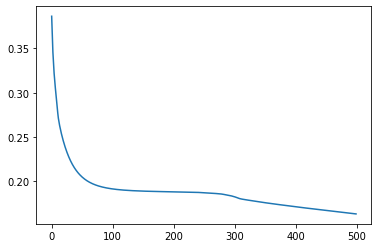

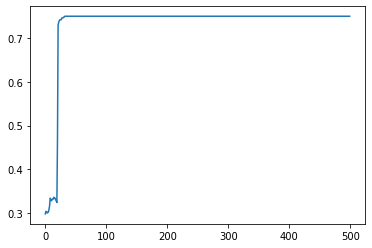

In [10]:
#PLOT ACCURACIES
plt.plot(history.history['loss'])
plt.show()
plt.plot(history.history['binary_accuracy'])
plt.show()

In [11]:
#PREDICT AND PLOT
predictions = model.predict(X)

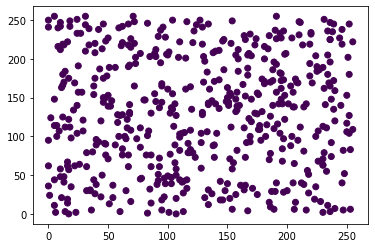

In [12]:
c = np.round(predictions)

plt.scatter(*zip(*X), c=c.T[0])
plt.show()

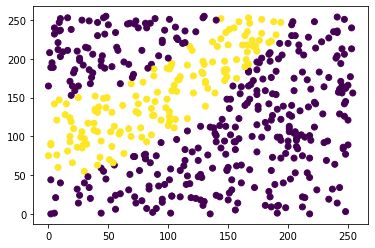

In [13]:
#NEW DATA AND PLOT
Z_t = create_data(num_data_points)
X_t = Z_t[:,:-1]
y_t = Z_t[:,-1]
y_t = y_t.reshape(-1,1)

c_t = y_t.T[0]
plt.scatter(*zip(*X_t), c=c_t)
plt.show()

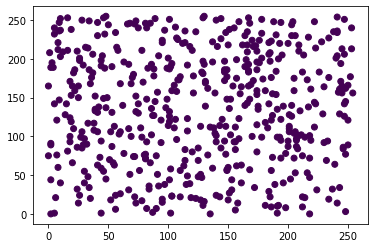

In [14]:
predictions_p = model.predict(X_t)
c_p = np.round(predictions_p)

plt.scatter(*zip(*X_t), c=c_p.T[0])
#plt.axes().set_aspect('equal','datalim')
plt.show()

In [ ]:
#K4 validation
#1000 data points
#10 breakouts with 100 data points
#for each 100, 80/20

#Compare layers
    #For yours and Keras
#Compare those results